In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orchard-apple/README.roboflow.txt
/kaggle/input/orchard-apple/valid/train-2564-_jpg.rf.457b28ad0830da41480f9abbdbfba511.jpg
/kaggle/input/orchard-apple/valid/train-1911-_jpg.rf.e9b5c5841d15888dac9a2c080b86d4ce.jpg
/kaggle/input/orchard-apple/valid/train-103-_jpg.rf.db7dee9920691eb0b3d48f30259c8c50.jpg
/kaggle/input/orchard-apple/valid/train-2941-_jpg.rf.de45b5aac2f646023b46ebe61dfe1d0e.jpg
/kaggle/input/orchard-apple/valid/train-3775-_jpg.rf.50f27080fd0c0c8951b5051ba3eee47d.jpg
/kaggle/input/orchard-apple/valid/train-1685-_jpg.rf.5c7c8b9bf9b92fa047e5e4094b14d074.jpg
/kaggle/input/orchard-apple/valid/train-3351-_jpg.rf.415257a93a1eaac61e63256ddc3baef9.jpg
/kaggle/input/orchard-apple/valid/train-2974-_jpg.rf.1a99d18009d825f9008e2830ed8b9066.jpg
/kaggle/input/orchard-apple/valid/train-2503-_jpg.rf.f2f264ce9846cd19e028c4733a7a3463.jpg
/kaggle/input/orchard-apple/valid/train-3193-_jpg.rf.dceb7d517e741396c5a947f359265396.jpg
/kaggle/input/orchard-apple/valid/train-974-_jpg.rf.3

In [1]:
import shutil

shutil.copy("/kaggle/input/orchard_yolo11n/pytorch/default/1/best.pt", "/kaggle/working/best.pt")

'/kaggle/working/best.pt'

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
model = YOLO("/kaggle/working/best.pt")

model.export(format="tflite")

Ultralytics 8.3.22 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/kaggle/working/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (5.2 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success ✅ 2.2s, saved as '/kaggle/working/best.onnx' (10.2 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1729834216.532802     184 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1729834216.532855     184 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1729834219.531560     184 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1729834219.531598     184 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 46.8s, saved as '/kaggle/working/best_saved_model' (25.7 MB)

TensorFlow Lite: starting export with tensorflow 2.16.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/best_saved_model/best_float32.tflite' (10.2 MB)

Export complete (47.6s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=/kaggle/working/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/dataset.yaml  
Visualize:       https://netron.app


'/kaggle/working/best_saved_model/best_float32.tflite'

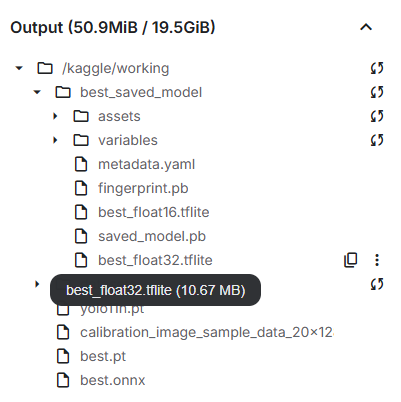

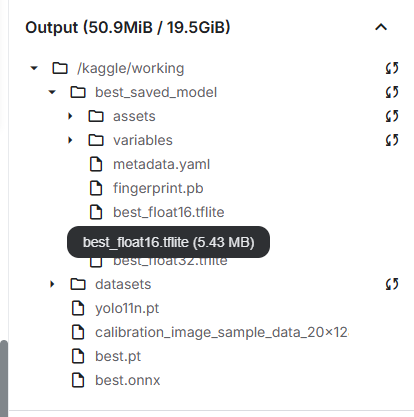

보통은 FP32로 저장이 되지만, ultralytics라이브러리를 이용하여 tflite파일로 변환하게 되면 FP32의 절반 크기인 FP16파일로도 변환을 시켜 저장해줍니다. <br>
약 3000개의 사진을 학습한 모델이지만 파일크기는 5~10MB로 안드로이드 등의 환경에서 사용이 가능합니다.